# MLOps con MLflow

#### Get data

In [1]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


#### Preprocessing

In [30]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          # log_plots = True,
          experiment_name = 'diamond',
         verbose = True, use_gpu=True)

,Description,Value
0,Session id,3500
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


#### Model Training

In [31]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,598.0807,1585175.4482,1230.6347,0.9843,0.0650,0.0476,2.3760
rf,Random Forest Regressor,697.2967,2125049.5412,1419.8767,0.9793,0.0767,0.0556,1.9210
et,Extra Trees Regressor,699.2947,2204527.1106,1430.9481,0.9787,0.0774,0.0567,1.3990
gbr,Gradient Boosting Regressor,749.9067,2373421.7851,1511.6139,0.9765,0.0763,0.0573,1.1910
dt,Decision Tree Regressor,924.9396,3942143.3549,1953.6533,0.9610,0.1028,0.0736,0.7720
ada,AdaBoost Regressor,1985.9574,16483415.2325,4026.1508,0.8377,0.1906,0.1543,1.1320
knn,K Neighbors Regressor,2923.2777,34514512.4929,5832.4721,0.6609,0.3501,0.2237,0.8180
omp,Orthogonal Matching Pursuit,3223.7075,70393548.7530,8331.8371,0.2821,0.2786,0.2187,0.7290
lasso,Lasso Regression,6516.2017,113173794.4168,10621.5834,-0.1236,0.7102,0.5642,0.7570
en,Elastic Net,6516.2017,113173794.4168,10621.5834,-0.1236,0.7102,0.5642,0.6550


In [33]:
tuned_best = tune_model(best)

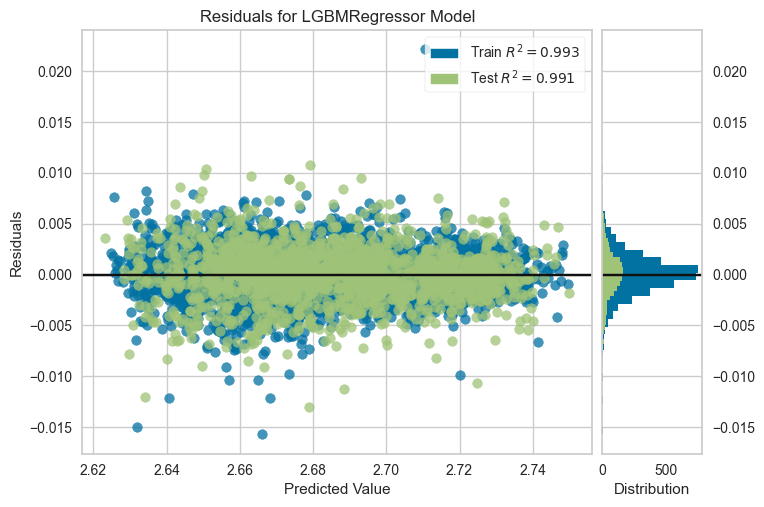

In [34]:
# check the residuals of trained model
plot_model(tuned_best, plot = 'residuals')

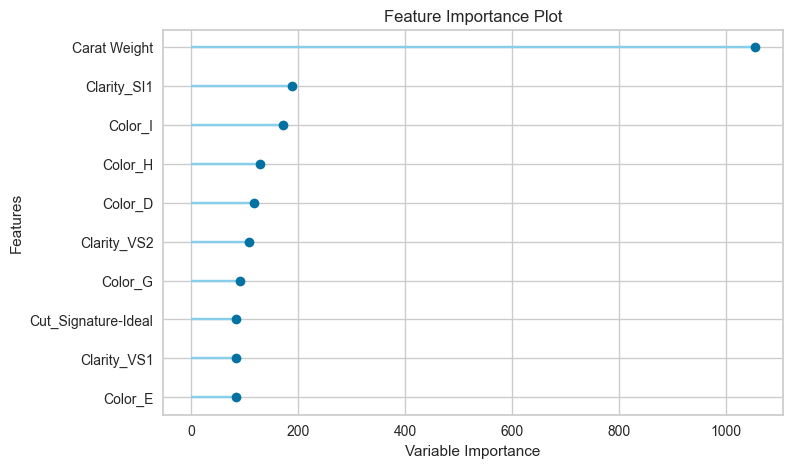

In [5]:
# check feature importance
plot_model(tuned_best, plot = 'feature')

In [21]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\WMYFHCK\AppData\Local\Temp\joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerW...
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                                                     

### Model management with MLFlow

In [7]:
# within notebook (notice ! sign infront)
!mlflow ui


^C


In [8]:
#localhost:5000

In [36]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


### Consume the model

In [37]:
import mlflow
logged_model = 'runs:/14f22e72cb29422fbd16745813db5942/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data).drop(["Price"], axis=1))

0        5440.047605
1        3591.522813
2        3390.511263
3        4564.470475
4        3276.566317
            ...     
5995     6207.019943
5996     5740.058906
5997     6149.542328
5998    11165.044601
5999    37830.332664
Name: Price, Length: 6000, dtype: float64

In [38]:
# print pipeline
print(loaded_model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 14f22e72cb29422fbd16745813db5942



In [39]:
pipeline = load_model('C:/Users/WMYFHCK/Documents/github_personal/mlops/Model versioning and registration with MLFlow/mlruns/1/14f22e72cb29422fbd16745813db5942/artifacts/model/model')

Transformation Pipeline and Model Successfully Loaded


In [24]:
pipeline = load_model('diamond-pipeline')

Transformation Pipeline and Model Successfully Loaded


In [40]:
# print pipeline
print(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\WMYFHCK\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerW...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                         

In [41]:
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [42]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5440.047605
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3591.522813
2,0.85,Ideal,H,SI1,EX,EX,GIA,3390.511263
3,0.91,Ideal,E,SI1,VG,VG,GIA,4564.470475
4,0.83,Ideal,G,SI1,EX,EX,GIA,3276.566317
